## Building a Deep Audio Classifier

Data source: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing

### 1. Import and Install Dependencies

#### 1.1 Install Dependencies

In [1]:
# !pip install tensorflow tensorflow-io matplotlib

#### 1.2 Load Dependencies

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

2025-07-15 21:28:11.450097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Build Data Loading Function

#### 2.1 Define Paths to Files

In [3]:
CAPUCHIN_FILE = os.path.join('archive', 'Parsed_Capuchinbird_Clips', 'XC3776-0.wav')
NON_CAPUCHIN_FILE = os.path.join('archive', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [4]:
CAPUCHIN_FILE, NON_CAPUCHIN_FILE

('archive/Parsed_Capuchinbird_Clips/XC3776-0.wav',
 'archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav')

#### 2.2 Build Dataloading Function

In [5]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removing trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [6]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
file_contents

2025-07-15 21:28:14.655733: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00}\xef\xa1\xec2\xed:\xf1H\xf4\x9e\xf3\xd0\xf1\x07\xf3\\\xf7\x12\xfb\xfe\xfbP\xfc\x05\xffV\x03\xc9\x05;\x05\x9a\x04\xc3\x06w\n9\x0cg\x0b;\x0b%\x0e\x16\x12\x15\x13\xbd\x10\xf3\x0e\xcb\x10n\x14\xa1\x15j\x13(\x11\xd9\x11\x08\x14\xcc\x13\xf9\x0fv\x0b>\t\xad\x08\xf8\x06u\x03\xaf\x00\xf9\x00\'\x03\xde\x03\x96\x01>\xfe\x90\xfc\xc5\xfc\x8c\xfc\r\xfa*\xf6\x89\xf3\xb7\xf3\x86\xf56\xf6#\xf4g\xf0\xd9\xedD\xee\x89\xf0\xe4\xf1)\xf1P\xf0:\xf2\xfc\xf6f\xfb\x9b\xfcw\xfbQ\xfb\x9b\xfd(\x00s\x00\x80\xff\xb6\x00\x05\x05\x10\tc\t?\x070\x07\xbe\n\xbe\r\x84\x0b\x80\x05<\x02U\x05\xa4\n/\x0b\xdc\x05\xb4\x00\x11\x01\xd8\x04|\x05\x9d\x00\xeb\xfa\xba\xf9\x14\xfco\xfc`\xf8\xc2\xf37\xf3\xba\xf5\x1a\xf6Y\xf2\xc5\xeef\xf0\x0c\xf6S\xf9\x7f\xf6"\xf1\xa7\xef\x93\xf3\'\xf8\xa8\xf8\x14\xf6a\xf5%\xf9\xc0\xfe\xf1\x01\xc3\x01\xf1\x00-\x02_\x05\xa2\x08\xda\nm\x0c\x00\x0

In [7]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [8]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.1289978 ],
       [-0.15133667],
       [-0.14691162],
       ...,
       [ 0.11514282],
       [ 0.10748291],
       [ 0.1100769 ]], dtype=float32)>

In [9]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [10]:
len(wav)

132300

In [11]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)
wav

2025-07-15 21:28:14.857088: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


<tf.Tensor: shape=(48000, 1), dtype=float32, numpy=
array([[ 1.0432389e-06],
       [-3.0215922e-06],
       [ 1.9820709e-06],
       ...,
       [-4.5542806e-02],
       [-5.4887902e-02],
       [-8.5778177e-02]], dtype=float32)>

#### 2.3 Plot Wave

In [12]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NON_CAPUCHIN_FILE)

In [13]:
wave

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0432389e-06, -3.0215922e-06,  1.9820709e-06, ...,
       -4.5542806e-02, -5.4887902e-02, -8.5778177e-02], dtype=float32)>

In [14]:
nwave

<tf.Tensor: shape=(48927,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.00054067,
        0.02472705, -0.00794304], dtype=float32)>

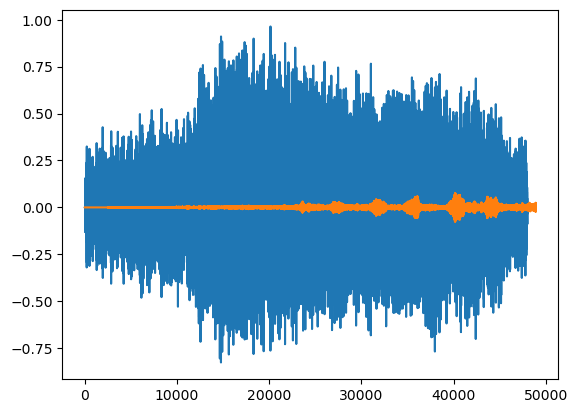

In [15]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

### 3. Create Tensorflow Dataset

#### 3.1 Define Paths to Positive and Negative Data

In [16]:
POS = os.path.join('archive', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('archive', 'Parsed_Not_Capuchinbird_Clips')

In [17]:
POS

'archive/Parsed_Capuchinbird_Clips'

In [18]:
NEG

'archive/Parsed_Not_Capuchinbird_Clips'

#### 3.2 Create Tensorflow Datasets

In [19]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [20]:
pos.as_numpy_iterator().next()

2025-07-15 21:28:15.679864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]
2025-07-15 21:28:15.680107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]


b'archive/Parsed_Capuchinbird_Clips/XC46241-5.wav'

#### 3.3 Add Labels and Combine Positive and Negative Samples

In [21]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [22]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [23]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [24]:
positives.as_numpy_iterator().next()

2025-07-15 21:28:15.779536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2025-07-15 21:28:15.780031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]


(b'archive/Parsed_Capuchinbird_Clips/XC114132-6.wav', 1.0)

In [25]:
negatives.as_numpy_iterator().next()

2025-07-15 21:28:15.801531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]
2025-07-15 21:28:15.802281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]


(b'archive/Parsed_Not_Capuchinbird_Clips/curlew-sound-1.wav', 0.0)

In [26]:
data.shuffle(1000).as_numpy_iterator().next()

2025-07-15 21:28:15.835120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]
2025-07-15 21:28:15.836972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]


(b'archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-28.wav',
 0.0)

### 4. Determine Average Length of a Capuchin Call

#### 4.1 Calculate Wave Cycle Length

In [27]:
os.listdir(os.path.join('archive', 'Parsed_Capuchinbird_Clips'))

['XC388470-4.wav',
 'XC495697-2.wav',
 'XC216010-4.wav',
 'XC433953-10.wav',
 'XC114131-0.wav',
 'XC216012-12.wav',
 'XC433953-6.wav',
 'XC201990-0.wav',
 'XC216012-1.wav',
 'XC216012-10.wav',
 'XC178168-6.wav',
 'XC44070-0.wav',
 'XC227468-4.wav',
 'XC216012-13.wav',
 'XC600460-2.wav',
 'XC227468-1.wav',
 'XC526106-4.wav',
 'XC227468-2.wav',
 'XC395129-5.wav',
 'XC227471-0.wav',
 'XC178167-2.wav',
 'XC227468-3.wav',
 'XC168899-0.wav',
 'XC395129-4.wav',
 'XC433953-7.wav',
 'XC227468-0.wav',
 'XC114131-3.wav',
 'XC216012-14.wav',
 'XC227471-1.wav',
 'XC387509-5.wav',
 'XC3776-6.wav',
 'XC98557-0.wav',
 'XC526106-0.wav',
 'XC216012-6.wav',
 'XC3776-0.wav',
 'XC526106-1.wav',
 'XC216012-5.wav',
 'XC227469-4.wav',
 'XC216010-5.wav',
 'XC513083-0.wav',
 'XC216012-9.wav',
 'XC495697-4.wav',
 'XC216012-7.wav',
 'XC307385-0.wav',
 'XC433953-9.wav',
 'XC216012-0.wav',
 'XC22397-6.wav',
 'XC479556-0.wav',
 'XC216010-1.wav',
 'XC65196-4.wav',
 'XC600460-1.wav',
 'XC3776-2.wav',
 'XC65195-0.wav',

In [28]:
lengths = []
for file in os.listdir(os.path.join('archive', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('archive', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [29]:
lengths

[48000,
 56000,
 56000,
 55999,
 40000,
 48000,
 48000,
 64000,
 48000,
 64000,
 48000,
 48000,
 56000,
 40000,
 56000,
 64000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 64000,
 48000,
 40000,
 56000,
 48000,
 48000,
 48000,
 56000,
 64000,
 64000,
 56000,
 48000,
 48000,
 56000,
 48000,
 56000,
 48000,
 48000,
 64000,
 48000,
 56000,
 48000,
 39999,
 64000,
 56000,
 64000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 64000,
 64000,
 56000,
 32000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 72000,
 56000,
 40000,
 40000,
 56000,
 56000,
 56000,
 56000,
 64000,
 48000,
 56000,
 56000,
 48000,
 48000,
 56000,
 64000,
 64000,
 56000,
 64000,
 56000,
 48000,
 56000,
 48000,
 72000,
 48000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 48000,
 40000,
 64000,
 40000,
 64000,
 32000,
 64000,
 56000,
 55999,
 56000,
 64000,
 48000,
 48000,
 56000,
 56000,
 56000,
 80000,
 48000,
 48000,
 56000,
 72000,
 56000,
 64000,
 40000,
 48000,
 40000,
 56000,
 56000,
 64000,
 56000,


#### 4.2 Calculate Mean, Min and Max

In [30]:
54156/16000  # average capuchin bird call length

3.38475

In [31]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [32]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [33]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

### 5. Build Preprocessing Function to Convert to Spectrogram

#### 5.1 Build Preprocessing Function

In [34]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [35]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav], 0)

In [36]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0432389e-06, -3.0215922e-06,  1.9820709e-06, ...,
       -4.5542806e-02, -5.4887902e-02, -8.5778177e-02], dtype=float32)>

In [37]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)

In [38]:
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=float32, numpy=
array([[1.9284576e-02, 2.5178067e-02, 2.9214473e-02, ..., 3.1451735e-04,
        2.5453046e-04, 4.2855740e-05],
       [9.8426342e-03, 6.1191549e-03, 8.5132420e-03, ..., 4.6083337e-04,
        2.3399896e-04, 2.1843612e-04],
       [1.1091478e-02, 6.1595612e-03, 8.8293683e-03, ..., 5.1367306e-04,
        3.0327094e-04, 2.1337718e-04],
       ...,
       [6.3687041e-03, 7.4077337e-03, 1.7366953e-02, ..., 5.8575958e-04,
        2.5817397e-04, 1.5325844e-05],
       [5.7284534e-03, 1.0320810e-02, 9.9355401e-03, ..., 6.0393481e-04,
        2.4145524e-04, 8.3535910e-05],
       [4.4908077e-03, 4.3124957e-03, 1.3786455e-02, ..., 5.7142752e-04,
        2.6778522e-04, 1.0924041e-04]], dtype=float32)>

In [39]:
spectrogram = tf.expand_dims(spectrogram, axis=2)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.9284576e-02],
        [2.5178067e-02],
        [2.9214473e-02],
        ...,
        [3.1451735e-04],
        [2.5453046e-04],
        [4.2855740e-05]],

       [[9.8426342e-03],
        [6.1191549e-03],
        [8.5132420e-03],
        ...,
        [4.6083337e-04],
        [2.3399896e-04],
        [2.1843612e-04]],

       [[1.1091478e-02],
        [6.1595612e-03],
        [8.8293683e-03],
        ...,
        [5.1367306e-04],
        [3.0327094e-04],
        [2.1337718e-04]],

       ...,

       [[6.3687041e-03],
        [7.4077337e-03],
        [1.7366953e-02],
        ...,
        [5.8575958e-04],
        [2.5817397e-04],
        [1.5325844e-05]],

       [[5.7284534e-03],
        [1.0320810e-02],
        [9.9355401e-03],
        ...,
        [6.0393481e-04],
        [2.4145524e-04],
        [8.3535910e-05]],

       [[4.4908077e-03],
        [4.3124957e-03],
        [1.3786455e-02],
        ...,
        [5.7142752

#### 5.2 Test Out the Function and Viz the Spectrogram

2025-07-15 21:28:26.985918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]
2025-07-15 21:28:26.986539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]


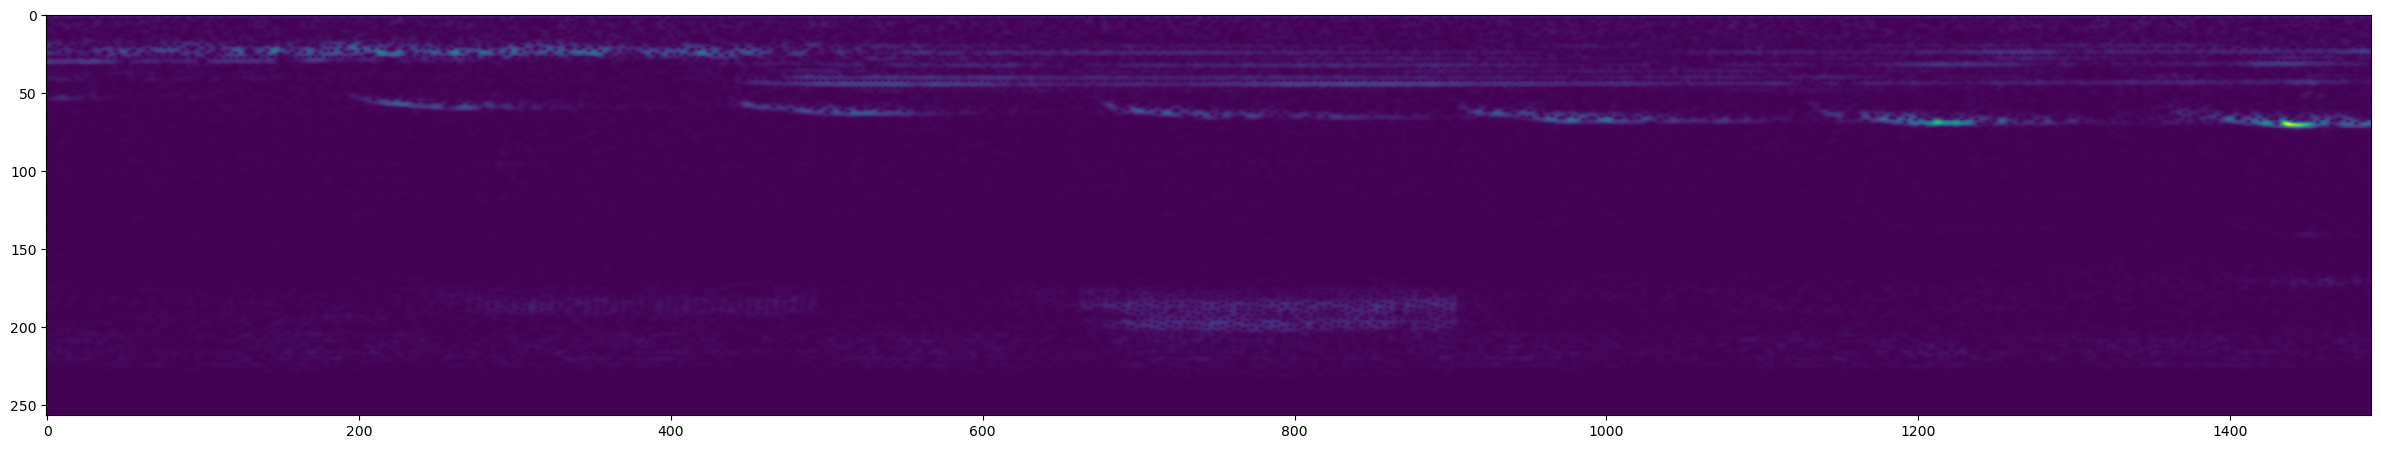

In [40]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

2025-07-15 21:28:27.609701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]
2025-07-15 21:28:27.610266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]


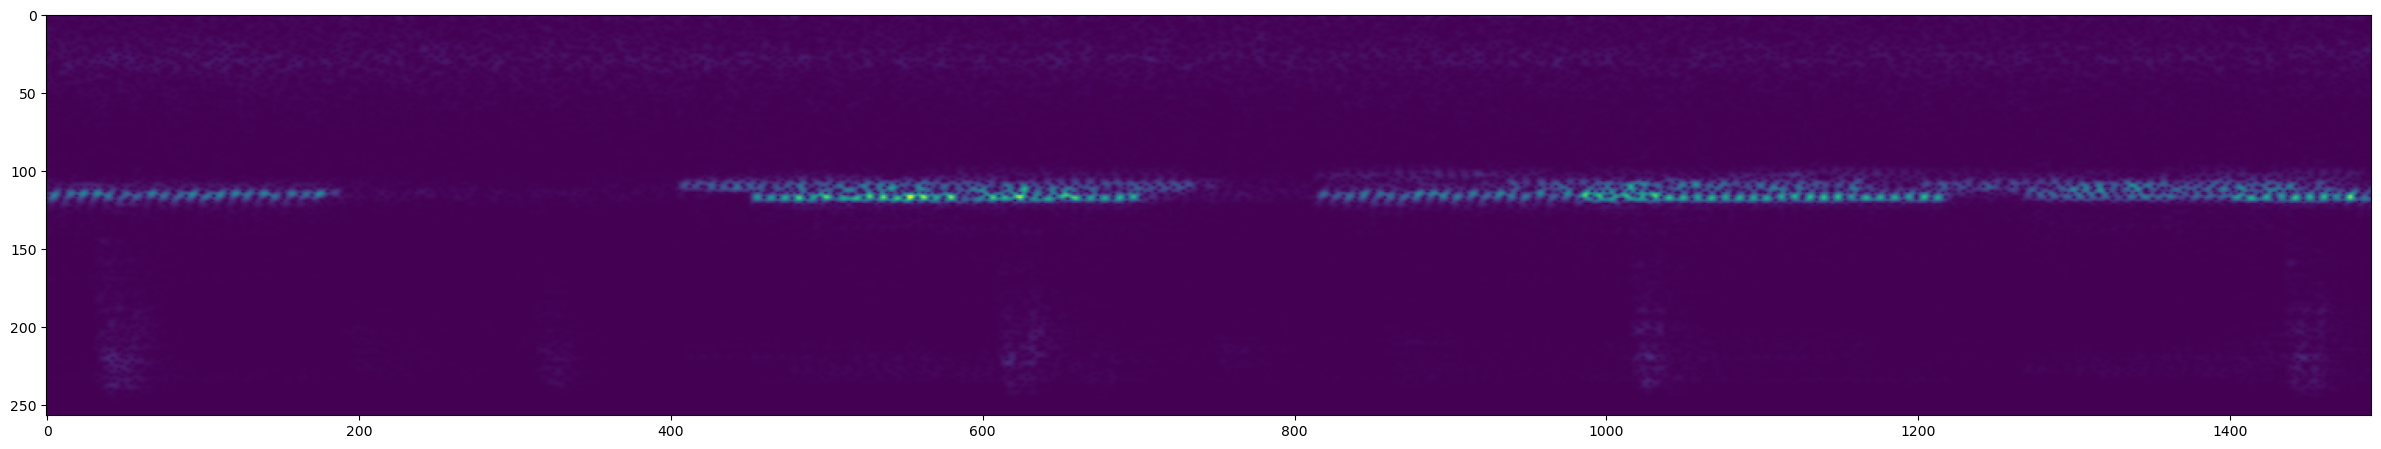

In [41]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### 6. Create Training and Testing Partitions

#### 6.1 Create a Tensorflow Data Pipeline

In [42]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [43]:
data.as_numpy_iterator().next()

2025-07-15 21:28:28.683827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]
2025-07-15 21:28:28.684908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]
2025-07-15 21:28:38.739120: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 592 of 1000
2025-07-15 21:28:42.649620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


(array([[[[1.41073331e-01],
          [1.24215774e-01],
          [7.38367364e-02],
          ...,
          [2.09623468e-05],
          [2.27651690e-05],
          [4.77880239e-05]],
 
         [[1.51737481e-01],
          [1.17656104e-01],
          [5.23790717e-02],
          ...,
          [2.19713220e-05],
          [4.27090272e-05],
          [5.08502126e-05]],
 
         [[1.42907843e-01],
          [1.10338613e-01],
          [4.45482098e-02],
          ...,
          [2.71157878e-05],
          [4.37326162e-05],
          [7.72625208e-05]],
 
         ...,
 
         [[8.43748078e-03],
          [3.70085016e-02],
          [3.83305103e-02],
          ...,
          [8.34698367e-05],
          [3.12845041e-05],
          [1.04680657e-06]],
 
         [[2.71357484e-02],
          [4.38437872e-02],
          [4.09333855e-02],
          ...,
          [5.75999511e-05],
          [4.76314526e-05],
          [8.76560807e-06]],
 
         [[6.43052459e-02],
          [6.35873154e-02]

#### 6.2 Split into Training and Testing Partitions

In [44]:
len(data)*0.7

35.699999999999996

In [45]:
train = data.take(36)
test = data.skip(36).take(15)

#### 6.3 Test One Batch

In [46]:
samples, labels = train.as_numpy_iterator().next()

2025-07-15 21:28:42.717943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]
2025-07-15 21:28:42.719511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]


In [47]:
samples.shape

(16, 1491, 257, 1)

In [48]:
labels.shape

(16,)

### 7. Build Deep Learning Model

#### 7.1 Load Tensorflow Dependencies

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

#### 7.2 Build Sequential Model, Compile and View Summary

In [55]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[
                                                    tf.keras.metrics.Recall(),
                                                    tf.keras.metrics.Precision()
])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 744, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 371, 62, 16)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 368032)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### 7.3 Fit Model, View Loss and KPI Plots

In [58]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - ETA: 0s - loss: 0.2964 - recall_1: 0.8696 - precision_1: 0.8750  

2025-07-15 21:36:19.572990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]
2025-07-15 21:36:19.573749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]


36/36 [==============================] - 69s 2s/step - loss: 0.2964 - recall_1: 0.8696 - precision_1: 0.8750 - val_loss: 0.0323 - val_recall_1: 0.9545 - val_precision_1: 1.0000
Epoch 2/4
36/36 [==============================] - 51s 1s/step - loss: 0.0397 - recall_1: 0.9862 - precision_1: 0.9795 - val_loss: 0.0132 - val_recall_1: 0.9859 - val_precision_1: 1.0000
Epoch 3/4
36/36 [==============================] - 51s 1s/step - loss: 0.0163 - recall_1: 0.9812 - precision_1: 0.9937 - val_loss: 0.0064 - val_recall_1: 0.9844 - val_precision_1: 1.0000
Epoch 4/4
36/36 [==============================] - 51s 1s/step - loss: 0.0075 - recall_1: 0.9938 - precision_1: 0.9938 - val_loss: 0.0026 - val_recall_1: 1.0000 - val_precision_1: 1.0000


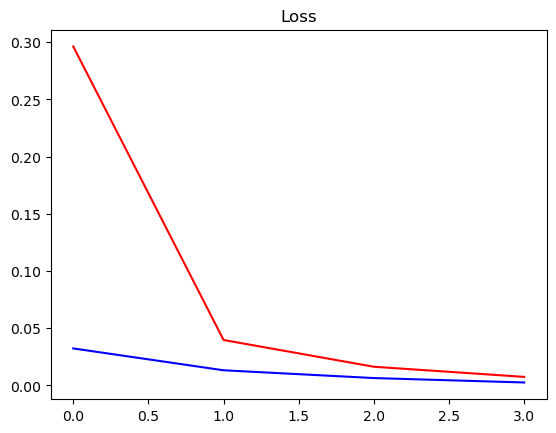

In [59]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [61]:
hist.history

{'loss': [0.2963600158691406,
  0.0397038459777832,
  0.016314927488565445,
  0.007459146901965141],
 'recall_1': [0.8695651888847351,
  0.9862068891525269,
  0.981249988079071,
  0.9938271641731262],
 'precision_1': [0.875,
  0.9794520735740662,
  0.9936708807945251,
  0.9938271641731262],
 'val_loss': [0.03233305364847183,
  0.013222985900938511,
  0.006420697085559368,
  0.002559136599302292],
 'val_recall_1': [0.9545454382896423, 0.98591548204422, 0.984375, 1.0],
 'val_precision_1': [1.0, 1.0, 1.0, 1.0]}

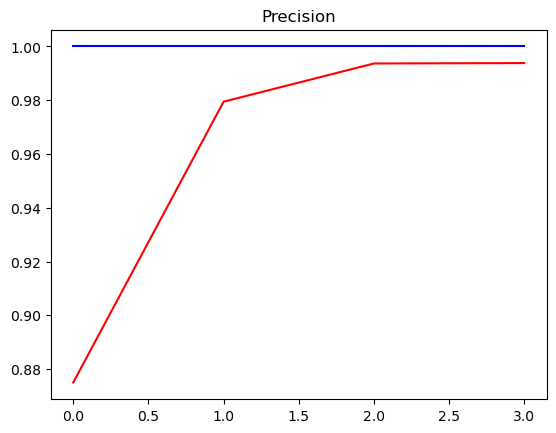

In [62]:
plt.title('Precision')
plt.plot(hist.history['precision_1'], 'r')
plt.plot(hist.history['val_precision_1'], 'b')
plt.show()

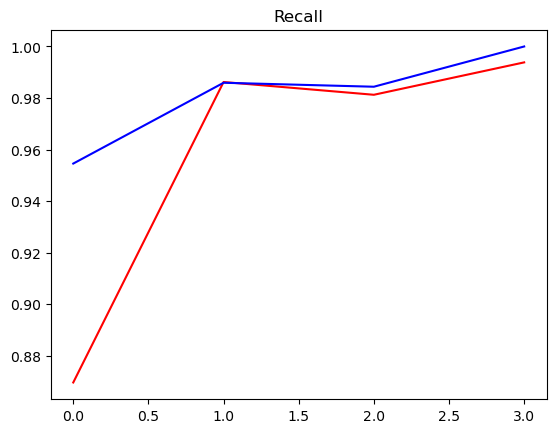

In [63]:
plt.title('Recall')
plt.plot(hist.history['recall_1'], 'r')
plt.plot(hist.history['val_recall_1'], 'b')
plt.show()

### 8. Make a Prediction on a Single Clip

#### 8.1 Get One Batch and Make a Prediction

In [64]:
X_test, y_test = test.as_numpy_iterator().next()

In [65]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 387ms/step


In [67]:
X_test.shape, y_test.shape

((16, 1491, 257, 1), (16,))

In [68]:
yhat

array([[6.8686910e-11],
       [1.1014794e-09],
       [1.0000000e+00],
       [6.2670185e-22],
       [1.9207985e-14],
       [3.7692187e-03],
       [9.9946654e-01],
       [4.5821376e-05],
       [1.1681693e-04],
       [1.3432013e-29],
       [1.0000000e+00],
       [3.3550025e-03],
       [5.1006768e-12],
       [9.1703379e-07],
       [1.6867798e-08],
       [9.9999845e-01]], dtype=float32)

#### 8.2 Convert Logits to Classes

In [69]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
yhat

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [71]:
tf.math.reduce_sum(yhat), tf.math.reduce_sum(y_test)

(<tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.0>)

In [72]:
y_test.astype(int)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

### 9. Build Forest Parsing Functions

#### 9.1 Load up MP3s

In [74]:
def load_mp3_16k_mono(filename):
    """Load a WAV file, convert it to a float tensor, resample to 16 kHz single channel value"""
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1)/2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 KHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [78]:
mp3 = os.path.join('archive', 'Forest Recordings', 'recording_00.mp3')

In [79]:
wav = load_mp3_16k_mono(mp3)
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [80]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [81]:
samples, index = audio_slices.as_numpy_iterator().next()
samples

2025-07-15 22:21:57.248463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:21:57.249140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


array([[ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
         6.2619494e-03, -1.5455363e-02, -8.7941047e-03]], dtype=float32)

In [83]:
samples.shape, len(audio_slices)

((1, 48000), 60)

#### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [84]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

#### 9.3 Convert Longer Clips into Windows and Make Predictions

In [85]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [91]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 2s 2s/step


In [92]:
yhat

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [93]:
len(yhat)

60

#### 9.4 Group Consecutive Detections

In [94]:
from itertools import groupby

In [95]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [96]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [98]:
calls

5

### 10. Make Predictions

#### 10.1 Loop over all recordings and make predictions

In [99]:
results = {}
for file in os.listdir(os.path.join('archive', 'Forest Recordings')):
    FILEPATH = os.path.join('archive', 'Forest Recordings', file)
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)
    results[file] = yhat

2025-07-15 22:44:45.301684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:44:45.302313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:44:48.698172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:44:48.699868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:44:52.084908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:44:52.085476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 3s 3s/step


2025-07-15 22:44:55.320650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:44:55.321637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:44:57.896726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:44:57.897304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:00.486492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:00.487057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:03.137675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:45:03.138226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:05.679027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:05.679923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:08.163403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:45:08.164324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:11.480860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:11.481634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:14.001955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:45:14.003087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:16.515075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:16.515847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:19.832611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:45:19.833520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:22.339024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:45:22.339611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:25.084833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:25.085508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:28.411741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:45:28.412312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:31.720499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:45:31.721057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:34.301576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:45:34.302151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:37.595122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:45:37.595710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:40.385071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:45:40.385706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:43.121179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:43.121764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:46.480630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:45:46.481197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 3s 3s/step


2025-07-15 22:45:49.661874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:45:49.662655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:52.580009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:45:52.580903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:55.558830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:45:55.559409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:45:58.221987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:45:58.222712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:00.711345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:46:00.712374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:03.047015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:46:03.048056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:05.380193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:46:05.381045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:07.864628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:46:07.865191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:10.238467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:46:10.239045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:12.638867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:12.639431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:15.104703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:46:15.105273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:17.398938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:17.400027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:20.513701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:20.514746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:23.250574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:46:23.251358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 3s 3s/step


2025-07-15 22:46:29.117447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:46:29.118030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:31.732330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:31.733543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:34.469304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:46:34.469881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:37.708941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:46:37.709572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:40.967976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:40.968686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:44.240435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:46:44.240991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:47.493471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:46:47.494060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:50.733601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:46:50.734170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:54.023476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:46:54.024358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:57.284301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:46:57.284873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:46:59.614150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:46:59.614729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:02.849664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:47:02.850219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:05.172782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:47:05.173371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:08.448419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:47:08.448980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:10.728227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:47:10.729639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:13.048132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:13.048738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:15.469223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:47:15.470013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:17.728586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:47:17.729164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:20.973051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:20.973807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:23.254632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:47:23.255188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:26.535761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:26.536604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:28.778922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:47:28.779492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:32.013478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:32.014043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:34.399336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:47:34.399895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:36.690956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:36.691529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:38.949062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:38.949651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:42.180328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:42.180890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:44.429050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:47:44.429615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:47.658770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:47.659343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:49.899592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:49.900153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:53.170771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:47:53.171345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:55.539670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:47:55.541837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:47:57.765617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:47:57.767225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:00.073502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:48:00.074055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:02.348172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:48:02.348747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:05.584200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:05.584769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:08.823644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:48:08.824445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:11.082852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:48:11.083877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:14.408163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:14.408721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:16.974170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:48:16.974759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:20.247759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:48:20.248474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:23.527729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2025-07-15 22:48:23.529194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:25.905306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:48:25.906109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:28.154442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:48:28.155039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:30.416484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:48:30.417345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:33.666186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:48:33.666793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:35.921868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:35.922726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:38.341593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:38.342471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:41.592957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:48:41.593872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:43.918727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:43.919509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:46.160445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:46.161202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:48.449231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:48:48.450002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:51.712490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:51.713212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:54.071663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:48:54.072404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:56.373783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:56.374355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:48:58.676610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:48:58.677165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:00.899541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:49:00.900115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:03.143604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:49:03.144166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:05.383212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2025-07-15 22:49:05.384070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:08.615927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:49:08.616508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:10.870075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2025-07-15 22:49:10.870666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:13.176453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2025-07-15 22:49:13.177012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:16.430602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2025-07-15 22:49:16.431171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2025-07-15 22:49:18.808261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2025-07-15 22:49:18.808836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


In [101]:
results

{'recording_44.mp3': array([[0.01159271],
        [0.01264991],
        [0.01102476],
        [0.01023399],
        [0.0130618 ],
        [0.00943998],
        [0.01209839],
        [0.01428931],
        [0.01518595],
        [0.00990993],
        [0.99999917],
        [0.9960447 ],
        [0.01377627],
        [0.01192769],
        [0.01089429],
        [0.01266337],
        [0.01072851],
        [0.01267103],
        [0.01294323],
        [0.01136005],
        [0.01573257],
        [0.01576556],
        [0.0119616 ],
        [0.01377514],
        [0.01203244],
        [0.01032241],
        [0.00956371],
        [0.01134407],
        [0.01433729],
        [0.01096631],
        [0.00978176],
        [0.01300248],
        [0.01052081],
        [0.01463889],
        [0.01485512],
        [0.01467708],
        [0.01348479],
        [0.01220783],
        [0.01185856],
        [0.01337389],
        [0.01169655],
        [0.01229203],
        [0.01170714],
        [0.01161036],
        [0.0

#### 10.2 Convert Predictions into Classes

In [100]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_44.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_90.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_93.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 'recording_81.mp3': [0,
  0,
  0,
  

#### 10.3 Group Consecutive Detections

In [103]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_44.mp3': 1,
 'recording_90.mp3': 0,
 'recording_93.mp3': 6,
 'recording_81.mp3': 5,
 'recording_23.mp3': 6,
 'recording_07.mp3': 2,
 'recording_96.mp3': 1,
 'recording_73.mp3': 0,
 'recording_92.mp3': 1,
 'recording_50.mp3': 0,
 'recording_64.mp3': 3,
 'recording_26.mp3': 2,
 'recording_30.mp3': 3,
 'recording_31.mp3': 1,
 'recording_76.mp3': 0,
 'recording_01.mp3': 0,
 'recording_58.mp3': 0,
 'recording_89.mp3': 3,
 'recording_95.mp3': 5,
 'recording_55.mp3': 0,
 'recording_97.mp3': 4,
 'recording_22.mp3': 2,
 'recording_68.mp3': 1,
 'recording_56.mp3': 2,
 'recording_57.mp3': 3,
 'recording_42.mp3': 0,
 'recording_51.mp3': 3,
 'recording_54.mp3': 3,
 'recording_99.mp3': 5,
 'recording_94.mp3': 3,
 'recording_52.mp3': 0,
 'recording_49.mp3': 0,
 'recording_98.mp3': 21,
 'recording_11.mp3': 4,
 'recording_91.mp3': 0,
 'recording_83.mp3': 0,
 'recording_36.mp3': 0,
 'recording_39.mp3': 1,
 'recording_79.mp3': 0,
 'recording_38.mp3': 17,
 'recording_17.mp3': 16,
 'recording_1

### 11. Export Results

In [104]:
import csv

In [107]:
with open('capuchinbird_results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])